In [1]:
import cvxpy as cp

(CVXPY) Apr 30 09:51:03 PM: Encountered unexpected exception importing solver GLPK:
ImportError("cannot import name 'glpk' from 'cvxopt' (/home/artem/Study/SDAFE/venv/lib/python3.11/site-packages/cvxopt/__init__.py)")
(CVXPY) Apr 30 09:51:03 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError("cannot import name 'glpk' from 'cvxopt' (/home/artem/Study/SDAFE/venv/lib/python3.11/site-packages/cvxopt/__init__.py)")


In [2]:
x = cp.Variable()
y = cp.Variable()

In [3]:
constraints = [x + y == 1, x - y >= 1]

In [4]:
obj = cp.Minimize((x - y) ** 2)

In [5]:
prob = cp.Problem(obj, constraints)
prob.solve()

1.0

In [6]:
prob.status

'optimal'

In [7]:
prob.value

1.0

In [8]:
x.value

array(1.)

In [9]:
y.value

array(1.57008621e-22)

In [10]:
prob2 = cp.Problem(cp.Maximize(x + y), prob.constraints)
prob2.solve()

0.9999999999945575

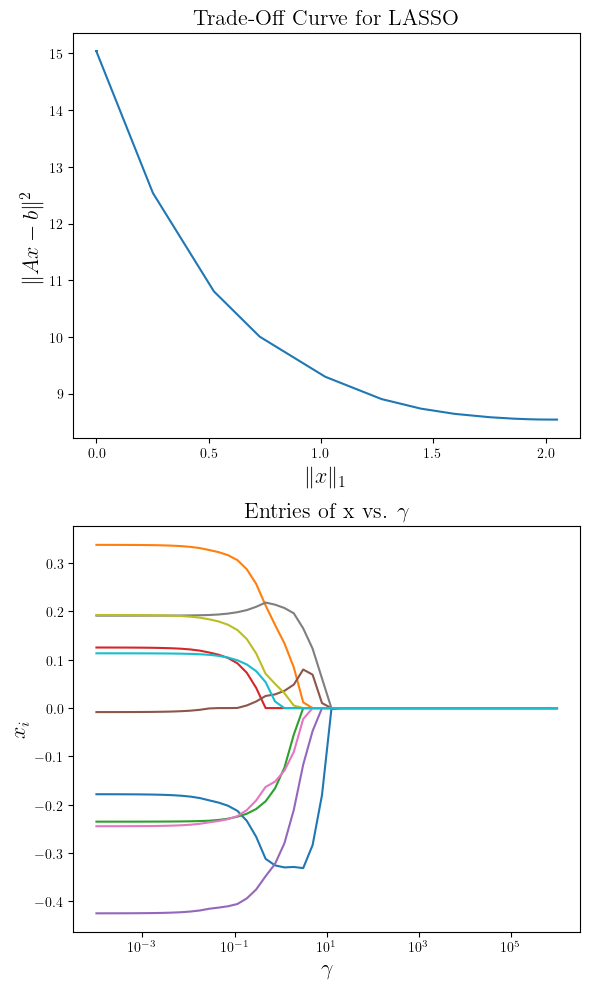

In [11]:
import cvxpy as cp
import numpy
import matplotlib.pyplot as plt

# Problem data.
n = 15
m = 10
numpy.random.seed(1)
A = numpy.random.randn(n, m)
b = numpy.random.randn(n)
# gamma must be nonnegative due to DCP rules.
gamma = cp.Parameter(nonneg=True)

# Construct the problem.
x = cp.Variable(m)
error = cp.sum_squares(A @ x - b)
obj = cp.Minimize(error + gamma*cp.norm(x, 1))
prob = cp.Problem(obj)

# Construct a trade-off curve of ||Ax-b||^2 vs. ||x||_1
sq_penalty = []
l1_penalty = []
x_values = []
gamma_vals = numpy.logspace(-4, 6)
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    # Use expr.value to get the numerical value of
    # an expression in the problem.
    sq_penalty.append(error.value)
    l1_penalty.append(cp.norm(x, 1).value)
    x_values.append(x.value)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(6,10))

# Plot trade-off curve.
plt.subplot(211)
plt.plot(l1_penalty, sq_penalty)
plt.xlabel(r'$\|x\|_1$', fontsize=16)
plt.ylabel(r'$\|Ax-b\|^2$', fontsize=16)
plt.title('Trade-Off Curve for LASSO', fontsize=16)

# Plot entries of x vs. gamma.
plt.subplot(212)
for i in range(m):
    plt.plot(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel(r'$\gamma$', fontsize=16)
plt.ylabel(r'$x_{i}$', fontsize=16)
plt.xscale('log')
plt.title(r'Entries of x vs. $\gamma$', fontsize=16)

plt.tight_layout()
plt.show()

In [12]:
import numpy as np

In [13]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
])
B = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
])

In [14]:
B @ A

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51],
       [39, 54, 69]])

In [15]:
cp.installed_solvers()

(CVXPY) Apr 30 09:51:09 PM: Encountered unexpected exception importing solver GLPK:
ImportError("cannot import name 'glpk' from 'cvxopt' (/home/artem/Study/SDAFE/venv/lib/python3.11/site-packages/cvxopt/__init__.py)")
(CVXPY) Apr 30 09:51:09 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError("cannot import name 'glpk' from 'cvxopt' (/home/artem/Study/SDAFE/venv/lib/python3.11/site-packages/cvxopt/__init__.py)")


['CVXOPT', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']

In [16]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial linear program.
m = 15
n = 10
np.random.seed(1)
s0 = np.random.randn(m)
lamb0 = np.maximum(-s0, 0)
s0 = np.maximum(s0, 0)
x0 = np.random.randn(n)
A = np.random.randn(m, n)
b = A @ x0 + s0
c = -A.T @ lamb0

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A @ x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)


The optimal value is -15.22091260555289
A solution x is
[-1.10133381 -0.16360111 -0.89734939  0.03216603  0.6069123  -1.12687348
  1.12967856  0.88176638  0.49075229  0.8984822 ]
A dual solution is
[6.98804740e-10 6.11756416e-01 5.28171747e-01 1.07296862e+00
 3.93758936e-09 2.30153870e+00 4.25704102e-10 7.61206896e-01
 8.36905855e-09 2.49370377e-01 1.30187037e-09 2.06014070e+00
 3.22417207e-01 3.84054343e-01 1.59493674e-09]


In [27]:
# Long only portfolio optimization.
import numpy as np
import scipy.sparse as sp

np.random.seed(1)
n = 3
mu = np.array([0.07, 0.1, 0.02])
vols = np.array([0.20, 0.30, 0.10])
corrs = np.array([
    [1.0, 0.8, -0.3],
    [0.8, 1.0, -0.3],
    [-0.3, -0.3, 1.0],
])
Sigma = np.diag(vols) @ corrs @ np.diag(vols)

In [31]:
w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mu.T @ w
risk = cp.quad_form(w, Sigma)
prob = cp.Problem(cp.Maximize(ret - gamma * risk), [cp.sum(w) == 1, w >= 0])

In [34]:
# Compute trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
weights = np.zeros((SAMPLES, n))
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value
    weights[i] = w.value

In [32]:
sr = ret_data / risk_data

In [33]:
np.argmax(sr)

48

In [36]:
weights[np.argmax(sr)]

array([0.25782325, 0.12914106, 0.61303568])

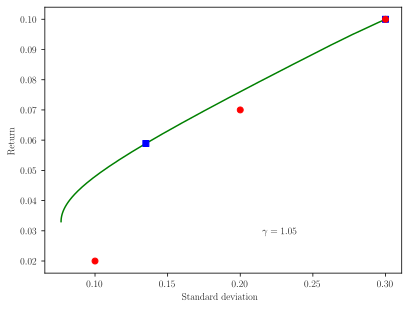

In [30]:
# Plot long only trade-off curve.
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, "g-")
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], "bs")
    ax.annotate(
        r"$\gamma = %.2f$" % gamma_vals[marker],
        xy=(risk_data[marker] + 0.08, ret_data[marker] - 0.03),
    )
for i in range(n):
    plt.plot(cp.sqrt(Sigma[i, i]).value, mu[i], "ro")
plt.xlabel("Standard deviation")
plt.ylabel("Return")
plt.show()